Loading Data

Data sets often contain diffrent types of data, and may have names associated with the rows or columns. For these reasons, they typically are best accommodated using a data frame. We can think of a data frame as a sequence of arrays of identical length; these are the columns. Entries in the different arrays can be combined for form a row. The pandas library can be used to create and work with data frame objects.

Reading in a Data Set

The first step of most analyses involves importing a data set into Python. Before attempting to load a data set, we must make sure that Python knows where to find the file containing it. If the file is in the same location as this notebook file, then we are all set. Otherwise, the command os.chdir() can be used to change directory.( You will need to call import os before calling os.chdir().)
We will begin by reading in Auto.csv, available on the book website. This is a comma-separated file, and can be read in using pd.read_csv():

In [4]:
import pandas as pd
Auto = pd.read_csv('Datasets/Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


The book website also has a whitespace-delimited version of this data, called Auto.data. This can be read in as follows:

In [5]:
Auto_ws = pd.read_csv('Datasets/Auto.data', sep='\s+')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anthonny.paz\AppData\Local\Temp\ipykernel_2292\1216660814.py:1: SyntaxWarning: invalid escape sequence '\s'
  Auto_ws = pd.read_csv('Datasets/Auto.data', sep='\s+')


In [6]:
Auto_ws

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


Both Auto.csv and Auto.data are simple text files. Before loading data into Python, it is good idea to view it using a text editor or other software, such as Microsoft Excel.
    We now take a look at the column of Auto corresponding to the variable horsepower.

In [7]:
Auto_ws['horsepower']

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392    86.00
393    52.00
394    84.00
395    79.00
396    82.00
Name: horsepower, Length: 397, dtype: object

We see that the dtype of this column is object. It turns out that all values of the horsepower column were interpreted as strings when reading in the data. We can find out why by looking at the unique values.

In [8]:
import numpy as np
np.unique(Auto_ws['horsepower'])

array(['100.0', '102.0', '103.0', '105.0', '107.0', '108.0', '110.0',
       '112.0', '113.0', '115.0', '116.0', '120.0', '122.0', '125.0',
       '129.0', '130.0', '132.0', '133.0', '135.0', '137.0', '138.0',
       '139.0', '140.0', '142.0', '145.0', '148.0', '149.0', '150.0',
       '152.0', '153.0', '155.0', '158.0', '160.0', '165.0', '167.0',
       '170.0', '175.0', '180.0', '190.0', '193.0', '198.0', '200.0',
       '208.0', '210.0', '215.0', '220.0', '225.0', '230.0', '46.00',
       '48.00', '49.00', '52.00', '53.00', '54.00', '58.00', '60.00',
       '61.00', '62.00', '63.00', '64.00', '65.00', '66.00', '67.00',
       '68.00', '69.00', '70.00', '71.00', '72.00', '74.00', '75.00',
       '76.00', '77.00', '78.00', '79.00', '80.00', '81.00', '82.00',
       '83.00', '84.00', '85.00', '86.00', '87.00', '88.00', '89.00',
       '90.00', '91.00', '92.00', '93.00', '94.00', '95.00', '96.00',
       '97.00', '98.00', '?'], dtype=object)

We see the culprit is the value ?, which is being used to encode missing values.
To fix the problem, we must provide pd.read_csv() with an argument called na_values. Now, each instance of ? in the file is replaced with the value np.nan, which means not a number:

In [9]:
Auto_ws = pd.read_csv('Datasets/Auto.data',
                      na_values=['?'],
                      sep='\s+')
Auto_ws['horsepower'].sum()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\anthonny.paz\AppData\Local\Temp\ipykernel_2292\3465400036.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+')


np.float64(40952.0)

The Auto_ws.shape attribute tells us that the data has 397 observations, or rows, and nine variables, or columns.

In [10]:
Auto_ws.shape

(397, 9)

There are various ways to deal with missing data. In this case, since only five of the rows contain missing observations, we choose to use the Auto_ws.dropna() method to simply remove these rows.

In [11]:
Auto_new = Auto_ws.dropna()
Auto_new.shape

(392, 9)

Basics os Selecting Rows and Columns

We can use Auto.columns to check the variable names.

In [12]:
Auto = Auto_new # overwrite the previous value
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

Accessing the rows and columns of a data frame is similar, but not identical, to accessing the rows and columns of an array. Recall that the first argument to the [] method is always applied to the rows of the array. Similarly, passing in a slice to the [] method creates a data frame whose rows are determined by the slice:

In [13]:
Auto[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


Similarly, an array of Booleans can be used to subset the rows:

In [14]:
idx_80 = Auto['year'] > 80
Auto[idx_80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490.0,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.0,2635.0,16.4,81,1,buick skylark
340,25.8,4,156.0,92.0,2620.0,14.4,81,1,dodge aries wagon (sw)
341,23.5,6,173.0,110.0,2725.0,12.6,81,1,chevrolet citation
342,30.0,4,135.0,84.0,2385.0,12.9,81,1,plymouth reliant
343,39.1,4,79.0,58.0,1755.0,16.9,81,3,toyota starlet
344,39.0,4,86.0,64.0,1875.0,16.4,81,1,plymouth champ
345,35.1,4,81.0,60.0,1760.0,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67.0,2065.0,17.8,81,3,subaru
347,37.0,4,85.0,65.0,1975.0,19.4,81,3,datsun 210 mpg


However, if we pass in a list of strings to the [] method, then we obtain a data frame containing the corresponding set o columns.

In [15]:
Auto[['mpg', 'horsepower']]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
392,27.0,86.0
393,44.0,52.0
394,32.0,84.0
395,28.0,79.0


Since we did not specify an index column when we loaded our data frame, the rows are labeled using 0 to 396.

In [16]:
Auto.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
      dtype='int64', length=392)

We can use the set_index() method to re-name the rows using the contents of Auto['name'].

In [17]:
Auto_re = Auto.set_index('name')
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790.0,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130.0,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295.0,11.6,82,1


In [18]:
Auto_re.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

We see that the column 'name' is no longer here.
Now that the index has been set to name, we can access rows of the data frame by name using the loc[] method of Auto:

In [19]:
rows = ['amc rebel sst', 'ford torino']
Auto_re.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


As a alternative to using the index name, we could retrieve the 4th and 5th rows of Auto using the iloc[] method:

In [20]:
Auto_re.iloc[:,[0, 2, 3]]

,mpg,displacement,horsepower
name,,,
chevrolet chevelle malibu,18.0,307.0,130.0
buick skylark 320,15.0,350.0,165.0
plymouth satellite,18.0,318.0,150.0
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0
...,...,...,...
ford mustang gl,27.0,140.0,86.0
vw pickup,44.0,97.0,52.0
dodge rampage,32.0,135.0,84.0


We can extract the 4th and 5h rows, as well as the 1st, 3rd and 4th columns, using a single call to iloc[]:

In [21]:
Auto_re.iloc[[3,4],[0, 2, 3]]

,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0


Index entries need not be unique: there are several cars in the data frame name ford galaxie 500.

In [22]:
Auto_re.loc['ford galaxie 500', ['mpg', 'origin']]

,mpg,origin
name,,
ford galaxie 500,15.0,1
ford galaxie 500,14.0,1
ford galaxie 500,14.0,1


More on Selecting Rows and Columns

Suppose now that we want to create a data frame consisting of the weight and origin of the subset of cars with year greater than 80, i.e. those built after 1980. To do this, we first create a Boolean array that index the rows. The loc[] method allows for Boolean entries as well as strings:

In [23]:
idx_80 = Auto_re['year'] > 80
Auto_re.loc[idx_80, ['weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490.0,1
buick skylark,2635.0,1
dodge aries wagon (sw),2620.0,1
chevrolet citation,2725.0,1
plymouth reliant,2385.0,1
toyota starlet,1755.0,3
plymouth champ,1875.0,1
honda civic 1300,1760.0,3
subaru,2065.0,3


To do this more concisely, we can use an anonymous function called a lambda:

In [24]:
Auto_re.loc[lambda df: df['year'] > 80, ['weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490.0,1
buick skylark,2635.0,1
dodge aries wagon (sw),2620.0,1
chevrolet citation,2725.0,1
plymouth reliant,2385.0,1
toyota starlet,1755.0,3
plymouth champ,1875.0,1
honda civic 1300,1760.0,3
subaru,2065.0,3


The lambda call creates a function that takes a single argument, here df and returns df['year']>80. Since it is created inside the loc[] method for the dataframe Auto_re, that dataframe will be the argument supplied. As another example of using a lambda, suppose that we want all cars built after 1980 that achiece greater than 30 miles per gallon:

In [25]:
Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30),
            ['weight', 'origin']]

,weight,origin
name,,
toyota starlet,1755.0,3
plymouth champ,1875.0,1
honda civic 1300,1760.0,3
subaru,2065.0,3
datsun 210 mpg,1975.0,3
toyota tercel,2050.0,3
mazda glc 4,1985.0,3
plymouth horizon 4,2215.0,1
ford escort 4w,2045.0,1


The symbol & computes an element-wise and operation. As another example, suppose that we want to retrieve all Ford and Datsum cars with displacement less than 300. We check whether each name entry contains either the string ford or datsum using the str.contains() method of the index attribute of the dataframe:

In [26]:
Auto_re.loc[lambda df: (df['displacement'] < 300)
                        & (df.index.str.contains('ford')
                        | df.index.str.contains('datsun')),
            ['weight', 'origin']
            ]

,weight,origin
name,,
ford maverick,2587.0,1
datsun pl510,2130.0,3
datsun pl510,2130.0,3
ford torino 500,3302.0,1
ford mustang,3139.0,1
datsun 1200,1613.0,3
ford pinto runabout,2226.0,1
ford pinto (sw),2395.0,1
datsun 510 (sw),2288.0,3


Here, the symbol | computes an element-wise or operation.
In summary, a powerful set of operations is available to index the rows and columns of data frames. For integer based queries, use the iloc[] method. For string and Boolean selections, use the loc[] method. For functional queries that filter rows, use the loc[] method with a function (typically a lambda) in the rows argument.

For loops

A for loop is a standard tool in many languages that repeatedly evaluates some chunk of code while varying different values inside the code. For example, suppose we loop over elements of a list and compute their sum.

In [27]:
total = 0
for value in [3, 2, 19]:
    total += value
print('Total is: {0}'.format(total))

Total is: 24


The indented code beneath the line with the for statement is run for each value in the sequence specified in the for statement. The loop ends either when the cell ends or when code is indented at the same level as the original for statement. We see that the final line above which prints the tota is executed only once after the for loop has terminated. Loops can be nested by additional indentation.

In [28]:
total = 0
for value in [2, 3, 19]:
    for weight in [3, 2, 1]:
        total += value * weight
print('Total is: {0}'.format(total))

Total is: 144


Above, we summed over each combination of value and weight. We also took advantage of the increment notation in Python: the expression a += b is equivalent to a = a + b. Besides being a convenient notation, this can save time in computationally heavy tasks in which the intermediate value of a+b need not be explicitly created.
Perhaps a more commom task would be to sum over (value, weight) pairs. For instance, to compute the average value of random variable that takes on possible values 2, 3 or 19 with probability 0.2, 0.3, 0.5 respectively we would computed the weighted sum. Tasks such as this can often be accomplished using the zip() function that loops over a sequence of tuples.

In [29]:
total = 0
for value, weight in zip([2, 3, 19],
                         [0.2, 0.3, 0.5]):
    total += weight * value
print('Weighted average is: {0}'.format(total))

Weighted average is: 10.8


String Formatting

In the code chunk above we also printed a string displaying the total. However, the object total is an integer and not a string. Inserting the value of something into a string is a commom task, made simple using some of the powerful string formatting tools in Python. Many data cleaning tasks involve manipulating and programmatically producing strings.
For example we may want to loop over the columns of a data frame and print the percent missing in each column. Let's create a data frame D with columns in which 20% of the entries are missing i.e. set to np.nan. We'll create the values in D from a normal distribution with mean 0 and variance 1 using rng.standard_normal() and the overwrite some random entries using rng.choice().

In [30]:
rng = np.random.default_rng(1)
A = rng.standard_normal((127, 5))
M = rng.choice([0, np.nan], p=[0.8, 0.2], size=A.shape)
A += M
D = pd.DataFrame(A, columns=['food',
                             'bar',
                             'pickle',
                             'snack',
                             'popcorn'])
D[:3]

,food,bar,pickle,snack,popcorn
0,0.345584,0.821618,0.330437,-1.303157,NaN
1,NaN,-0.536953,0.581118,0.364572,0.294132
2,NaN,0.546713,NaN,-0.162910,-0.482119


In [31]:
for col in D.columns:
    template = 'Column "{0}" has {1:.2%} missing values'
    print(template.format(col,
                          np.isnan(D[col]).mean()))

Column "food" has 16.54% missing values
Column "bar" has 25.98% missing values
Column "pickle" has 29.13% missing values
Column "snack" has 21.26% missing values
Column "popcorn" has 22.83% missing values


We see that the template.format() method expects two arguments {0} and {1:.2%}, and the latter includes some formatting information. In particular, it specifies that the second argument should be expressed as a percent with two decimal digits.
The reference docs.python.org/3/library/string.html includes many helpful and more complex examples.

Additional Graphical and Numerical Summaries

We can use the ax.plot() or ax.scatter() functions to display the quantitative variables. However, simply typing the variable names will produce an error message, because Python does no know to look in the Auto data set for those variables.

In [34]:
from matplotlib.pyplot import subplots

NameError: name 'horsepower' is not defined

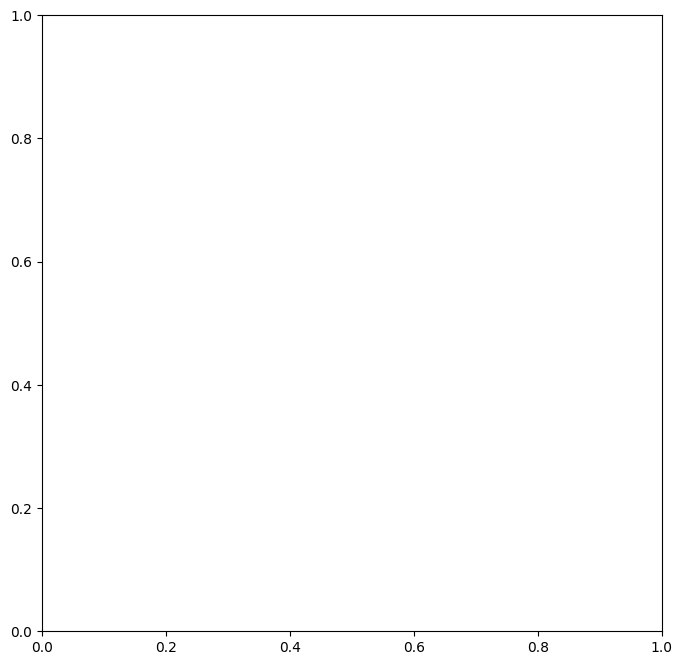

In [ ]:
#fig, ax = subplots(figsize=(8, 8))
#ax.plot(horsepower, mpg, 'o')

We can address this by accessing the columns directly:

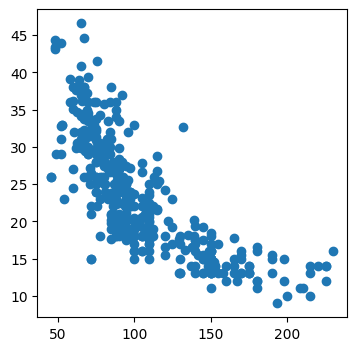

In [38]:
fig, ax = subplots(figsize=(4, 4))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');

Alternatively, 